In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from IPython.display import Image

import spacy
import en_core_web_sm

from sklearn.feature_extraction.text import TfidfVectorizer

import pyLDAvis.gensim

from wordcloud import WordCloud

import warnings
import os

pyLDAvis.enable_notebook()
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from infer_utils import *
from topic_utils import *

In [3]:
queries = ['"Donald Trump"']
new_scrapper = NewsScrapper(queries=queries)
filtered_articles_df = new_scrapper.extract_filter_content()
filtered_articles_df.head()

,Source,Title,Url,Published,Content,Text,Keywords
0,New York Times,Does Donald Trump Need a Bailout?,https://www.nytimes.com/2020/09/28/opinion/tru...,2020-09-29T00:36:13Z,"Coats, wrote Woodward, thought Putin had somet...",To hear more audio stories from publishers lik...,"[does, donald, unreported, trumps, need, unite..."
1,New York Times,Donald Trump Burns the First Debate Down,https://www.nytimes.com/2020/09/30/arts/televi...,2020-09-30T13:27:32Z,"The last four years, you have promised to repe...","“The last four years, you have promised to rep...","[debate, donald, youre, party, im, think, ball..."
2,New York Times,What Donald Trump Can Learn From Boris Johnson,https://www.nytimes.com/2020/10/04/opinion/tru...,2020-10-04T23:00:05Z,None of their voters expected either man to be...,"America, we’ve been here before you. We know w...","[learn, donald, mr, leader, virus, times, hand..."
4,Lifehacker.com,How the 2020 Votes Will Be Counted,https://lifehacker.com/how-the-2020-votes-will...,2020-10-01T15:15:00Z,"Typically, our focus, five weeks out from a pr...","Typically, our focus, five weeks out from a pr...","[process, vote, cast, election, mail, results,..."
6,Gizmodo.com,"So, Who Else Thinks the White House Is Totally...",https://gizmodo.com/so-who-else-thinks-the-whi...,2020-10-04T20:30:00Z,President Donald Trump is fine. Everythings fi...,Photo : Jim Watson ( Getty Images )\n\nPreside...,"[trumps, president, convince, trying, white, v..."


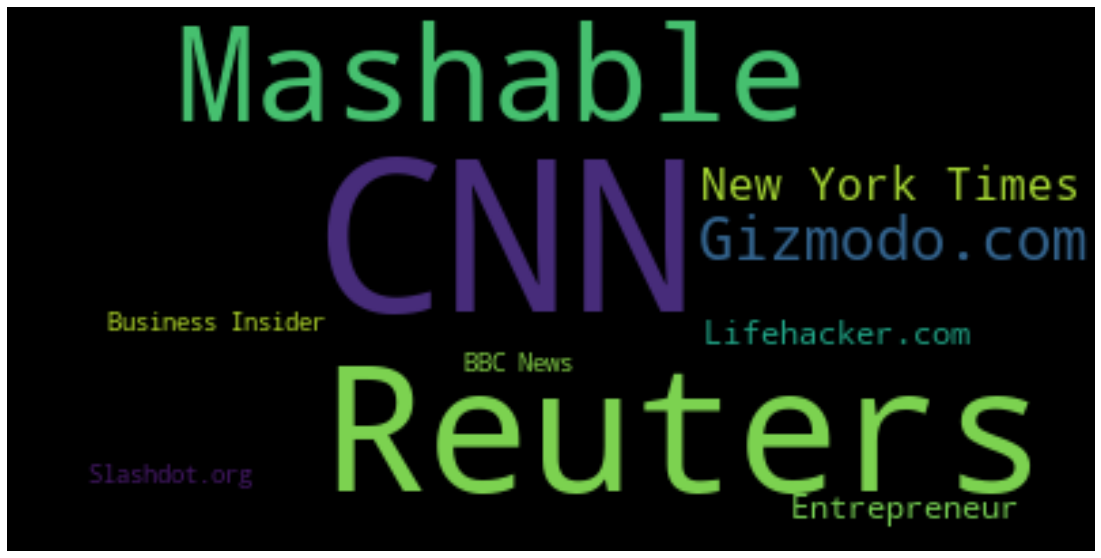

In [4]:
sources_dict = filtered_articles_df.Source.value_counts().to_dict()
w = WordCloud(background_color='black').generate_from_frequencies(sources_dict)
plt.figure(figsize=(20,10))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show();

In [5]:
filtered_articles_df.to_csv('filtered_articles_df.csv', index=False)

In [6]:
filtered_articles_df = pd.read_csv('filtered_articles_df.csv')

In [7]:
# Initialize TopicModeler class and pass filtered_df as argument
# Call generate_dominant_topic method on class instance and store result dataframe into df_dominant_topic variable.
topic_generator = TopicModeler(filtered_articles_df)
df_dominant_topic, optimal_model, corpus = topic_generator.generate_dominant_topic()
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contribution,Topic_Keywords,Clean_Text,Published,Source,Text,Keywords,Url
0,0,3.0,0.9896,"trump, biden, plan, president, also, health, p...","[hear, audio, story, publisher, new_york_times...",2020-09-29T00:36:13Z,New York Times,To hear more audio stories from publishers lik...,"['does', 'donald', 'unreported', 'trumps', 'ne...",https://www.nytimes.com/2020/09/28/opinion/tru...
1,1,2.0,0.9972,"trump, debate, biden, president, people, voter...","[last, four_years, repeal, obamacare, never, c...",2020-09-30T13:27:32Z,New York Times,"“The last four years, you have promised to rep...","['debate', 'donald', 'youre', 'party', 'im', '...",https://www.nytimes.com/2020/09/30/arts/televi...
2,2,4.0,0.9917,"president, trump, speedy_recovery, covid, heal...","[america, country, leader, downplay, virus, ig...",2020-10-04T23:00:05Z,New York Times,"America, we’ve been here before you. We know w...","['learn', 'donald', 'mr', 'leader', 'virus', '...",https://www.nytimes.com/2020/10/04/opinion/tru...
3,3,2.0,0.9978,"trump, debate, biden, president, people, voter...","[typically, focus, week, presidential, electio...",2020-10-01T15:15:00Z,Lifehacker.com,"Typically, our focus, five weeks out from a pr...","['process', 'vote', 'cast', 'election', 'mail'...",https://lifehacker.com/how-the-2020-votes-will...
4,4,6.0,0.9980,"trump, president, covid, friday, white_house, ...","[photo, jim, watson, getty_images, president, ...",2020-10-04T20:30:00Z,Gizmodo.com,Photo : Jim Watson ( Getty Images )\n\nPreside...,"['trumps', 'president', 'convince', 'trying', ...",https://gizmodo.com/so-who-else-thinks-the-whi...


In [8]:
# Visualization of topic using pyLDAvis library
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.135585  0.016821       1        1  33.536483
6      0.100379  0.028759       2        1  18.549315
2     -0.072651  0.057356       3        1  17.270904
3     -0.049183 -0.156621       4        1  11.976658
0     -0.107592  0.091986       5        1   9.580752
4      0.079460 -0.012695       6        1   4.672967
5     -0.085998 -0.025606       7        1   4.412920, topic_info=                 Term        Freq       Total Category  logprob  loglift
104            debate  125.000000  125.000000  Default  30.0000  30.0000
50          president  420.000000  420.000000  Default  29.0000  29.0000
85              biden  116.000000  116.000000  Default  28.0000  28.0000
1408  speedy_recovery   38.000000   38.000000  Default  27.0000  27.0000
115          election   86.000000   86.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
433      presidential    2.973708   70.974002   Topic7  -5.6126  -0.0519
180            people    3.010001  123.288122   Topic7  -5.6005  -0.5919
76               also    2.723771   90.078188   Topic7  -5.7004  -0.3780
233              vote    2.611539   55.747732   Topic7  -5.7425   0.0597
969          majority    2.548662   14.500642   Topic7  -5.7669   1.3820

[495 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
845       1  0.973145          abbott
1690      6  0.500975        abdullah
3048      7  0.499998        abortion
1315      2  0.951465         account
498       1  0.411487  administration
...     ...       ...             ...
244       4  0.105062            year
244       5  0.105062            year
244       7  0.070041            year
3554      2  0.951517             yen
3555      2  0.951498         zealand

[972 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 4, 1, 5, 6])

In [9]:
# Create a dataframe that has Dominant topic number as index and associated topic keywords and
# number of documents with that topic as columns
topic_dist = pd.concat([df_dominant_topic[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
                        .sort_values('Dominant_Topic').set_index('Dominant_Topic'), df_dominant_topic['Dominant_Topic'].
                       value_counts().sort_index()], axis=1)
topic_dist.columns = ['Topic_Keywords', 'Num_Document']
topic_dist.index.name = 'Dominant_Topic'
topic_dist.reset_index(inplace=True)

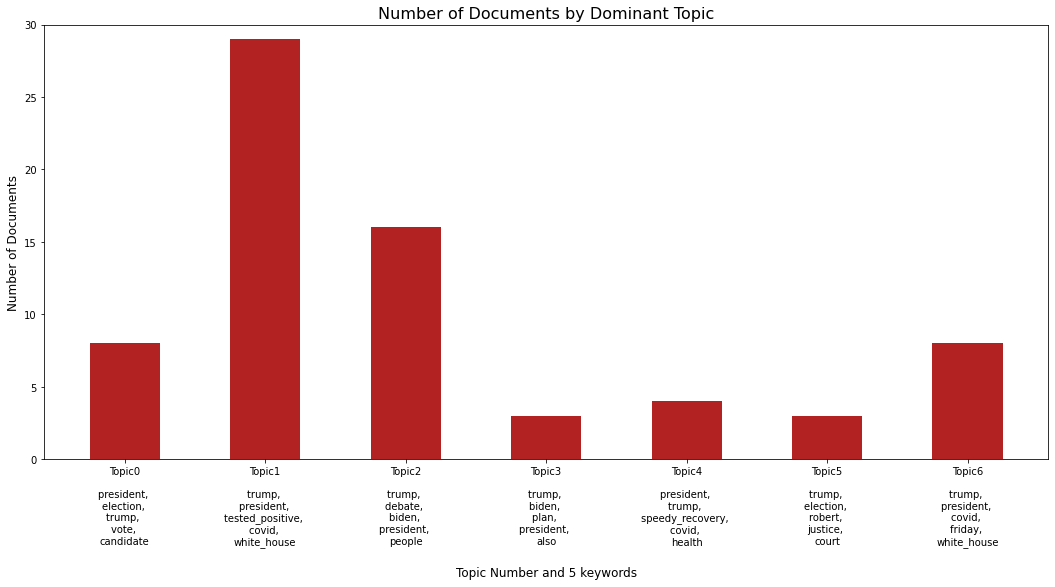

In [10]:
# create a dataframe with topic and 5 words for that topic
topic_top5words = [(int(row.Dominant_Topic), topic) for _, row in topic_dist.iterrows() for j, topic in 
                   enumerate(row.Topic_Keywords.rsplit(', ')) if j < 5]
df_top5words_stacked = pd.DataFrame(topic_top5words, columns=['topic_id', 'words'])
df_top5words = df_top5words_stacked.groupby('topic_id').agg(', \n'.join)

# Plot bar chart showing most discussed topic in documents
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(x='Dominant_Topic', height='Num_Document', data=topic_dist, width=.5, color='firebrick')
ax.set_xticks(df_top5words.index)
tick_formatter = FuncFormatter(lambda x, pos: 'Topic' + str(x) + '\n\n' + df_top5words['words'][x])
ax.xaxis.set_major_formatter(tick_formatter)
ax.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=16))
ax.set_ylabel('Number of Documents', fontdict=dict(size=12))
ax.set_xlabel('\nTopic Number and 5 keywords', fontdict=dict(size=12))
ax.set_ylim(0, max(topic_dist.Num_Document)+1);

In [11]:
# Select documents with appropriate topic and store result dataframe into relevant_news variable
relevant_news = df_dominant_topic[['Published', 'Source', 'Text', 'Clean_Text', 'Keywords', 'Url']]
# Drop row with duplicate article text
relevant_news = relevant_news.drop_duplicates(subset=['Text'], ignore_index=True)

In [12]:
def extract_person_entity(article):
    """
    This function uses spacy model to list person entity recognized in the article text.
    """
    nlp = en_core_web_sm.load()
    doc = nlp(article)
    people = [X.text for X in doc.ents if (X.label_ == 'PERSON')]
#     exclude = []
#     people = [x for x in people if x.lower() not in exclude]
    people = list({person for person in people})
    return people

In [13]:
# Call exxtract_org_entity function on each text for relevant news dataframe and create a column 'Entities' from reulsting
# list of person entities
relevant_news['Entities'] = relevant_news.Text.map(extract_person_entity)
relevant_news.to_csv('relevant_news.csv', index=False)
relevant_news.head()

,Published,Source,Text,Clean_Text,Keywords,Url,Entities
0,2020-09-29T00:36:13Z,New York Times,To hear more audio stories from publishers lik...,"[hear, audio, story, publisher, new_york_times...","['does', 'donald', 'unreported', 'trumps', 'ne...",https://www.nytimes.com/2020/09/28/opinion/tru...,"[Android, Russ Buettner, Bob Woodward, Putin, ..."
1,2020-09-30T13:27:32Z,New York Times,"“The last four years, you have promised to rep...","[last, four_years, repeal, obamacare, never, c...","['debate', 'donald', 'youre', 'party', 'im', '...",https://www.nytimes.com/2020/09/30/arts/televi...,"[Barrett, Joe, Harris]"
2,2020-10-04T23:00:05Z,New York Times,"America, we’ve been here before you. We know w...","[america, country, leader, downplay, virus, ig...","['learn', 'donald', 'mr', 'leader', 'virus', '...",https://www.nytimes.com/2020/10/04/opinion/tru...,"[Trump, Johnson, Boris Johnson’s]"
3,2020-10-01T15:15:00Z,Lifehacker.com,"Typically, our focus, five weeks out from a pr...","[typically, focus, week, presidential, electio...","['process', 'vote', 'cast', 'election', 'mail'...",https://lifehacker.com/how-the-2020-votes-will...,"[Donald Trump, DRE, Joe Biden]"
4,2020-10-04T20:30:00Z,Gizmodo.com,Photo : Jim Watson ( Getty Images )\n\nPreside...,"[photo, jim, watson, getty_images, president, ...","['trumps', 'president', 'convince', 'trying', ...",https://gizmodo.com/so-who-else-thinks-the-whi...,"[Melania, Mark Meadows, ET, Twitter, Joe Biden..."


In [14]:
relevant_news = pd.read_csv('relevant_news.csv')
relevant_news['Clean_Text'] = relevant_news.Clean_Text.map(get_clean_text)
relevant_news.head()
sentiment_analyzer = SentimentAnalyzer(relevant_news, 'Clean_Text')
predictions = sentiment_analyzer.sentiment_to_dataframe()

In [16]:
pos_df = predictions[predictions['Sentiment'] == 1]
neg_df = predictions[predictions['Sentiment'] == -1]

def get_text(df):
    texts = []
    exclude_list = []
    for content in df['Clean_Text']:
        word_list = content.strip("][").split(', ')
        word_list = [word.strip("''") for word in word_list]
        content = [word for word in word_list if word not in exclude_list]
        texts.append(' '.join(content))
    return texts

pos_text = get_text(pos_df)
neg_text = get_text(neg_df)

def generate_wordcloud(text):
    vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2, max_features=100)
    tdm = vectorizer.fit_transform(text)
    freqs = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
    word_dict = {}
    for word_weight in freqs:
        word_dict[word_weight[0]] = word_weight[1]
    
    w = WordCloud(background_color='black').generate_from_frequencies(word_dict)
    plt.figure(figsize=(20,10))
    plt.imshow(w, interpolation='bilinear')
    plt.axis('off')
    plt.show();

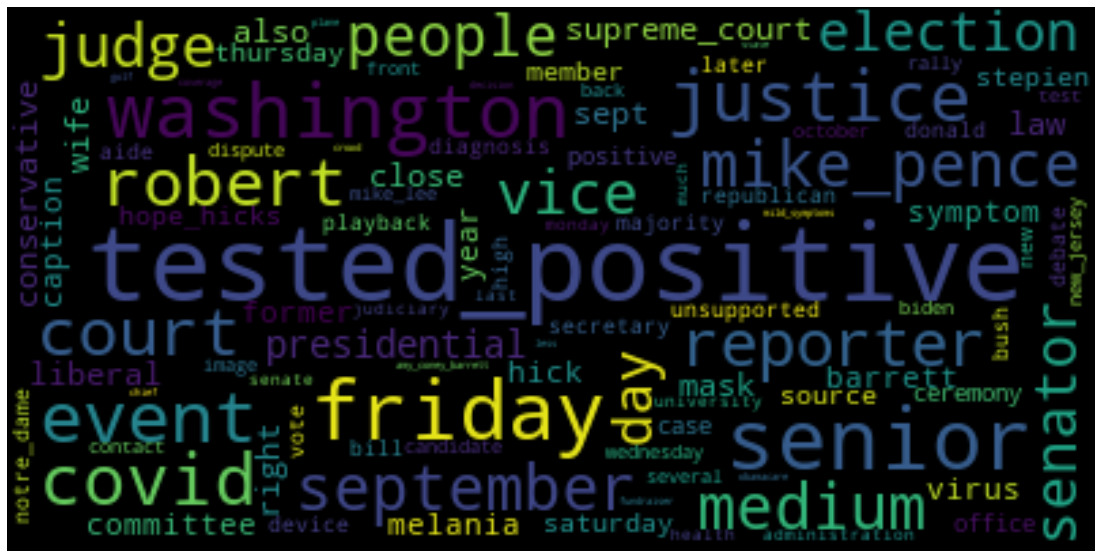

In [19]:
generate_wordcloud(pos_text)

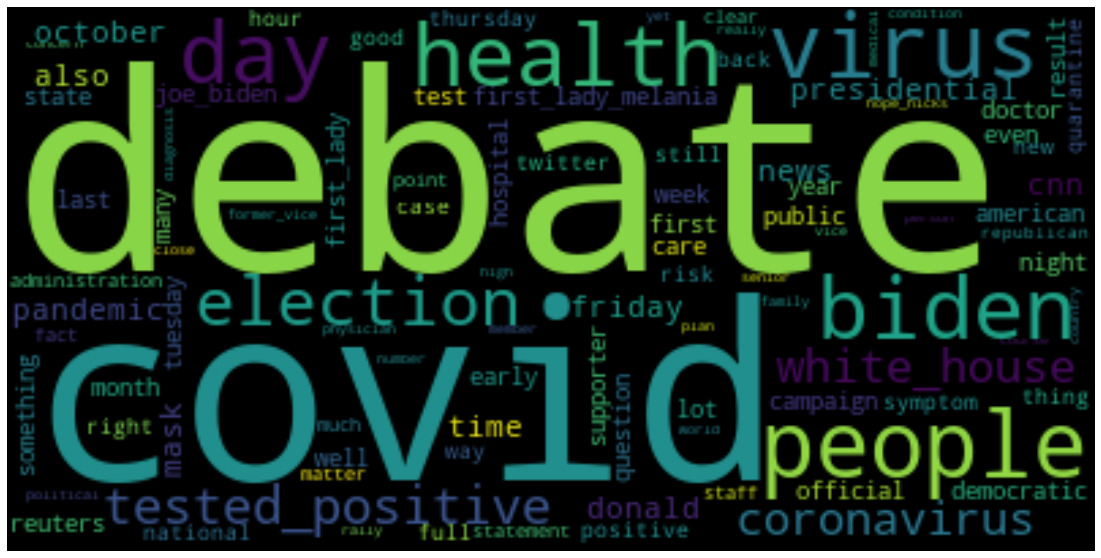

In [20]:
generate_wordcloud(neg_text)

In [49]:
queries = ['"Donald Trump"']
tweet_scrapper = TweetScrapper(queries=queries)
clean_tweets_df = tweet_scrapper.get_clean_tweet()
clean_tweets_df.head()

,Clean_Text,Published,Text
0,representation privilege covid access best hea...,2020/10/06,"this is a representation of privilege, you don..."
1,absolutely correct vote complacent result majo...,2020/10/06,@SarahKSilverman @MichelleObama is absolutely ...
2,donald trump virus common cold caught bubonic ...,2020/10/06,Donald Trump downplaying the virus like it was...
3,actually donald trump president,2020/10/06,"when you think about it, it’s actually mind bl..."
4,donald trump hospital public menace america re...,2020/10/06,@JoeBiden Now that Donald Trump is out of the ...


In [50]:
sentiment_analyzer = SentimentAnalyzer(clean_tweets_df, 'Clean_Text')
predictions = sentiment_analyzer.sentiment_to_dataframe()

In [51]:
pos_df = predictions[predictions['Sentiment'] == 1]
neg_df = predictions[predictions['Sentiment'] == -1]

pos_text = get_text(pos_df)
neg_text = get_text(neg_df)

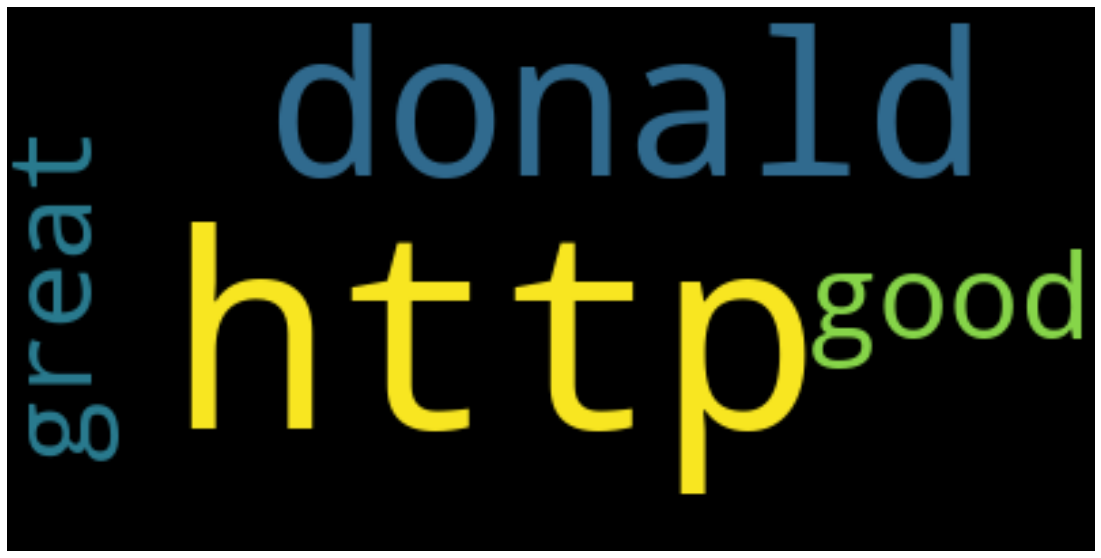

In [52]:
generate_wordcloud(pos_text)

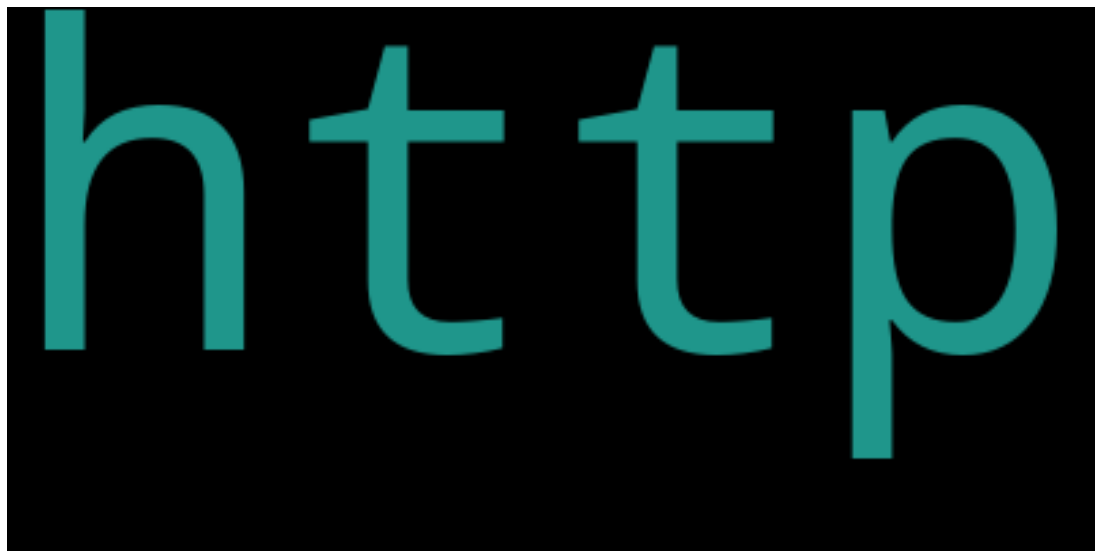

In [53]:
generate_wordcloud(neg_text)